# <center><font size=6> HW2: Deep NN</font></center>
<center><font size=3><i>By Jiye Lyu and Xiang Ou </i></font></center>  
<center><font size=3><i>04/22/2021</i></font></center>

---

In [1]:
import numpy as np
np.random.seed(123)
import pandas as pd

import keras
from keras.datasets import mnist
from keras. models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop

import matplotlib.pyplot as plt
plt.ion()

In [2]:
data = pd.read_csv('Data.csv', low_memory=False)
data.head()

,ActIntAmusementParkVisit,ActIntZooVisit,ActIntWineLovers,ActIntDoityourselfers,ActIntHomeImproveSpenders,ActIntHuntingEnthusiasts,BuyerLuxuryStoreShop,LifestyleMedicalPolicy,ActIntDigitalMagNewspaper,ActIntAttendsEducationProg,...,MortgageLoanType,ESTCURRMTHLYMORTGPAYMTRNG,MosaicGlobalZip4,PresenceOfCreditCard,InterestInCrafts,InterestInGourmetCooking,ComputersPeripherals,HiTechOwner,InternetOnlineSubscriber,Flag
0,26.0,68.0,65.0,37.0,53.0,41.0,40.0,69.0,78.0,67.0,...,NaN,0U,E,U,Y,Y,Y,Y,Y,0
1,47.0,46.0,2.0,31.0,9.0,68.0,5.0,14.0,48.0,10.0,...,C,1M,B,Y,U,U,Y,Y,Y,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Preprocessing: Check/Fix Data Types

In [3]:
data_index = np.where(data.dtypes == object)
object_data = data[data.columns[data_index]]

In [4]:
data_index2 = np.where(data.dtypes == np.float64)
float_data = data[data.columns[data_index2]]
float_data = float_data.astype(float)

## Preprocessing: Missing Data

In [5]:
new_data = pd.concat([float_data,object_data], axis = 1)

In [6]:
#keep variables that have less than 70% missing values
perc = 70.0
min_count = int(((100-perc)/100) * new_data.shape[0] + 1)
new_data = new_data.dropna(axis = 1, thresh = min_count)
new_data.shape

(39508, 376)

In [7]:
new_data = new_data.fillna(data.mean())
new_data.head()

,ActIntAmusementParkVisit,ActIntZooVisit,ActIntWineLovers,ActIntDoityourselfers,ActIntHomeImproveSpenders,ActIntHuntingEnthusiasts,BuyerLuxuryStoreShop,LifestyleMedicalPolicy,ActIntDigitalMagNewspaper,ActIntAttendsEducationProg,...,TypeofPurchase,MortgageAmountRanges,ESTCURRMTHLYMORTGPAYMTRNG,MosaicGlobalZip4,PresenceOfCreditCard,InterestInCrafts,InterestInGourmetCooking,ComputersPeripherals,HiTechOwner,InternetOnlineSubscriber
0,26.000000,68.000000,65.000000,37.000000,53.00000,41.000000,40.000000,69.000000,78.000000,67.000000,...,U,U,0U,E,U,Y,Y,Y,Y,Y
1,47.000000,46.000000,2.000000,31.000000,9.00000,68.000000,5.000000,14.000000,48.000000,10.000000,...,R,L,1M,B,Y,U,U,Y,Y,Y
2,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing: Dummify Categorical Variables

In [8]:
new_new_data = pd.get_dummies(new_data)

In [9]:
new_new_data.head()

,ActIntAmusementParkVisit,ActIntZooVisit,ActIntWineLovers,ActIntDoityourselfers,ActIntHomeImproveSpenders,ActIntHuntingEnthusiasts,BuyerLuxuryStoreShop,LifestyleMedicalPolicy,ActIntDigitalMagNewspaper,ActIntAttendsEducationProg,...,InterestInCrafts_U,InterestInCrafts_Y,InterestInGourmetCooking_U,InterestInGourmetCooking_Y,ComputersPeripherals_U,ComputersPeripherals_Y,HiTechOwner_U,HiTechOwner_Y,InternetOnlineSubscriber_U,InternetOnlineSubscriber_Y
0,26.000000,68.000000,65.000000,37.000000,53.00000,41.000000,40.000000,69.000000,78.000000,67.000000,...,0,1,0,1,0,1,0,1,0,1
1,47.000000,46.000000,2.000000,31.000000,9.00000,68.000000,5.000000,14.000000,48.000000,10.000000,...,1,0,1,0,0,1,0,1,0,1
2,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,0,0,0,0,0,0,0,0,0,0
3,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,0,0,0,0,0,0,0,0,0,0
4,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing: Normalization

In [10]:
def normalization(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [11]:
Norm_new_data = normalization(new_new_data)
Norm_new_data.head()

,ActIntAmusementParkVisit,ActIntZooVisit,ActIntWineLovers,ActIntDoityourselfers,ActIntHomeImproveSpenders,ActIntHuntingEnthusiasts,BuyerLuxuryStoreShop,LifestyleMedicalPolicy,ActIntDigitalMagNewspaper,ActIntAttendsEducationProg,...,InterestInCrafts_U,InterestInCrafts_Y,InterestInGourmetCooking_U,InterestInGourmetCooking_Y,ComputersPeripherals_U,ComputersPeripherals_Y,HiTechOwner_U,HiTechOwner_Y,InternetOnlineSubscriber_U,InternetOnlineSubscriber_Y
0,0.255102,0.683673,0.653061,0.367347,0.530612,0.408163,0.397959,0.693878,0.785714,0.673469,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.469388,0.459184,0.010204,0.306122,0.081633,0.683673,0.040816,0.132653,0.479592,0.091837,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.410520,0.437645,0.667650,0.510600,0.604783,0.497693,0.423543,0.659317,0.438056,0.383135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.410520,0.437645,0.667650,0.510600,0.604783,0.497693,0.423543,0.659317,0.438056,0.383135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.410520,0.437645,0.667650,0.510600,0.604783,0.497693,0.423543,0.659317,0.438056,0.383135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train/Test/Validation Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Norm_new_data, data.Flag, test_size = 0.3, random_state = 0)

## Feature Selection: Lasso, Random Forest, Statistical Tests (t-test, ANOVA, Chi-Squared, etc.)

We tried many different ways to select features. Finally we choose logistic regression.

##### Lasso

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import  LogisticRegression

sel = SelectFromModel(LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear'))
sel.fit(X_train, Y_train)

SelectFromModel(estimator=LogisticRegression(C=0.1, penalty='l1',
                                             solver='liblinear'))

In [14]:
selected = X_train.columns[(sel.get_support())]

In [15]:
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel.estimator_.coef_ == 0)))

total features: 875
selected features: 140
features with coefficients shrank to zero: 735


##### Regression

##### ANOVA

##### CHI square

## Model Implementation

In [16]:
X_train = X_train[selected]
X_test = X_test[selected]

In [17]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [18]:
#Y_train = keras.utils.to_categorical(Y_train,2)
#Y_test = keras.utils.to_categorical(Y_test,2)
print('Dimension of the training target is:',Y_train.shape)
print('Dimension of the test target is:',Y_test.shape)

Dimension of the training target is: (27655,)
Dimension of the test target is: (11853,)


In [19]:
h_number = ((X_train.shape[0]/10)-1)/(len(selected)+2)
h_number

19.468309859154928

In [20]:
model = Sequential()
model.add(Dense(10,activation = 'relu',input_dim = len(selected)))
model.add(Dropout(0.2))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                1410      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,531
Trainable params: 1,531
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss = 'binary_crossentropy',optimizer = 'RMSprop',metrics = ['accuracy'])
#binary_crossentropy
#categorical_crossentropy

In [23]:
model.fit(X_train, Y_train, batch_size = 128, epochs = 5, validation_split = 1/ 6 ,verbose = 1)

Epoch 1/5
181/181 [==============================] - 0s 1ms/step - loss: 0.3538 - accuracy: 0.8963 - val_loss: 0.3108 - val_accuracy: 0.8996
Epoch 2/5
181/181 [==============================] - 0s 645us/step - loss: 0.3325 - accuracy: 0.8963 - val_loss: 0.3063 - val_accuracy: 0.8996
Epoch 3/5
181/181 [==============================] - 0s 694us/step - loss: 0.3263 - accuracy: 0.8963 - val_loss: 0.3027 - val_accuracy: 0.8996
Epoch 4/5
181/181 [==============================] - 0s 634us/step - loss: 0.3218 - accuracy: 0.8963 - val_loss: 0.3023 - val_accuracy: 0.8996
Epoch 5/5
181/181 [==============================] - 0s 623us/step - loss: 0.3191 - accuracy: 0.8963 - val_loss: 0.3012 - val_accuracy: 0.8996


## Model Evaluation

In [24]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [25]:
score = model.evaluate(X_test, Y_test)
print('\nModel',model.metrics_names[1],'on test set is',score[1])

371/371 [==============================] - 0s 340us/step - loss: 0.3141 - accuracy: 0.8947

Model accuracy on test set is 0.8947101831436157


In [26]:
y_predict = model.predict(X_test)
y_predict

array([[0.16374317],
       [0.17703703],
       [0.2588263 ],
       ...,
       [0.02148893],
       [0.01224047],
       [0.04658183]], dtype=float32)

### ROC Curve

In [27]:
fpr, tpr, threshold = metrics.roc_curve(Y_test,y_predict)
roc_auc = metrics.auc(fpr,tpr)

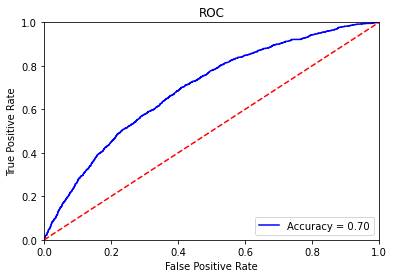

In [28]:
plt.plot(fpr, tpr, 'b', label = "Accuracy = %0.2f"% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Report

## a) Overall Discovery Process

The "Overall Discovery Process" is above.

## b) List of variables used in the model

In [29]:
selected

Index(['ActIntAmusementParkVisit', 'ActIntWineLovers',
       'LifestyleMedicalPolicy', 'ActIntAttendsEducationProg',
       'ActIntPoliticalTVLibComedy', 'ActIntPoliticalTVConservati',
       'ActIntCulturalArts', 'ActIntCasinoGambling',
       'StyleHighFreqCruiseEnthus', 'StyleFrequentFlyerPrgMbr',
       ...
       'MortgageAmountRanges_G', 'MortgageAmountRanges_K',
       'ESTCURRMTHLYMORTGPAYMTRNG_1F', 'MosaicGlobalZip4_C',
       'MosaicGlobalZip4_F', 'MosaicGlobalZip4_G', 'InterestInCrafts_U',
       'InterestInCrafts_Y', 'InterestInGourmetCooking_U',
       'InterestInGourmetCooking_Y'],
      dtype='object', length=140)

## c) Detailed analysis on model performance (e.g. ROC curves, confusion matrix, etc.)

### ROC

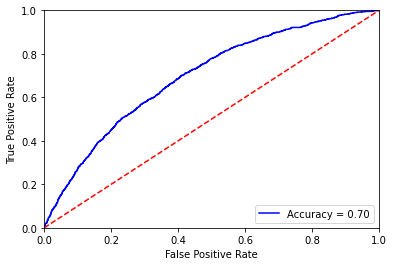

In [30]:
plt.plot(fpr, tpr, 'b', label="Accuracy = %0.2f"% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## d) Limited Factors/issues encounted and assumptions made


1. We decided to drop the columns that have more than 70% missing values. And we also use get_dummies to avoid NAN in categorical columns.

2. After trying different models like ANOVA, CHI-square and linear regression, we decided to use the Lasso Regression method to do the feature selection because it can show suggested columns directly ranther than set k (how many columns we want).

3. We adjusted the design for the networking, the model accuracy still keep at 89%. We have same answers with different models and we also try different numbers(Dense) of neurons in a reasonable limit. We even add layers but the result is still unchanged.